## Data Processing: Linear, Ridge, And Lasso Regression
----


In [1]:
import numpy as np
import pandas as pd


### Regression Models 
---
Models and Measuring fits;

bias-variance trade-offs come in, overfitted models

* Lasso
* Ridge
* OLS
* Support Vector Regression


###  Regression Setup
---
predict an output value from a continuous range
I have _causes_ and I want to predict _effects_

These can be plotted on a 2D graph, with a best fit line draw on the data using the linear equation: $ y = mx + b $

Minimize all the least squared residuals

Doing this for all possible regression lines for a plane, is finding the best fit line for a plane

_Residual_ of an regression are the differences between actual and fitted variable on the line. 

Oridinaly Least Squares minimizes this as its objective model


###  Good Detections Models can be found by Testing Fit
---
* Best fit mimizes the errors between the fit and the data; 
* Minimizing the Mean Squared Error is a goal
* Calculate fitted values for each values and calculate the difference between the observed values


### What to Do with All my Errors
---

* MSE -> variance of the residuals
* MSE can be extended to multiple linear regression models as well
* _BLUE_ -> Best Linear Unbiased Estimator

* _R2_ is calculated by dividing the ESS / TSS 

( explained Sum of squares / variance of actual values ) => How well the regression represented the data; the higher the number the higher the representation

* Other types of regression make use of other measure than MSE:
    * Ridge
    * Lasso
    * Elastic Net
    * Support Vector 


### Results Interpretation: T-Statistics and p-values
----
* Fairly "out of vogue"
* A T-Statistic is the computed measure of the number of standard deviations away from 0, that the current multiplier is.
* a p-value = 0.0501 is the same as a p-value of 0.0499
* One is a cause for celebration, the other not so much

### Loading in Data and Testing to See if We Can Predict if someone Owns a Car based on out `X` values
----

In [2]:
# Load some data to test with
df = pd.read_csv(filepath_or_buffer = "../data/available_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/available_data.csv'

In [3]:
df = pd.read_csv(filepath_or_buffer = '../data/available_data.csv')

In [4]:
df.head(2)

,emp_id,gender,age,salary,has_car
0,1,Male,25.0,86177.0,1
1,2,Male,27.0,67961.0,0


In [5]:
X = df.iloc[ : , 1:-1].values
y = df.iloc[ : , -1].values

In [6]:
X

array([['Male', 25.0, 86177.0],
       ['Male', 27.0, 67961.0],
       ['Female', nan, 88344.0],
       ['Male', 30.0, 86222.0],
       ['Female', 24.0, 105669.0],
       ['Female', 36.0, nan],
       [nan, 48.0, 68091.0],
       ['Female', 27.0, 65480.0],
       ['Female', 25.0, 79193.0],
       ['Male', 31.0, 104414.0]], dtype=object)

In [7]:
y

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

### Handling Missing Values
----
First Steps with any data project
Also, most of the steps in any data project are

*Data Cleaning*

#### Generic Steps
----
1. Create an Instance Variable of the Imputer/Scaler
2. `fit` that instance on the data
3. `transform` the data 

In [8]:
from sklearn.impute import SimpleImputer
#Imputation transformer for completing missing values.

In [9]:
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [10]:
# fit the imputer to the X vars
numerical_imputer.fit(X[ : , 1:3])
categorical_imputer.fit(X [ : , 0:1])

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [11]:
X[ : , 1:3] = numerical_imputer.transform(X[ : , 1:3])
X[ : , 0:1] = categorical_imputer.transform(X [ : , 0:1])

In [12]:
X

array([['Male', 25.0, 86177.0],
       ['Male', 27.0, 67961.0],
       ['Female', 27.0, 88344.0],
       ['Male', 30.0, 86222.0],
       ['Female', 24.0, 105669.0],
       ['Female', 36.0, 86177.0],
       ['Female', 48.0, 68091.0],
       ['Female', 27.0, 65480.0],
       ['Female', 25.0, 79193.0],
       ['Male', 31.0, 104414.0]], dtype=object)

### Handling Categorical Value
----
Nearly the Same process for categorical data as well

In [13]:
# grab the OneHotEncoder and ColumnTransformer from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
# declaring an instance variable of the encoder
gender_encoder = OneHotEncoder(sparse=False)

In [15]:
# build a column transformer, this can be expanded to encode more
# columns that were not specified in `transformers` will be passed
# through. This subset of columns is concatenated with the output of
# the transformers.
clm = ColumnTransformer(transformers=[
    ('cat', gender_encoder, [0])],
                        remainder='passthrough')

In [16]:
clm.fit(X)
X = clm.transform(X)

In [17]:
# [ M, F, Age, Salary]
X

array([[0.0, 1.0, 25.0, 86177.0],
       [0.0, 1.0, 27.0, 67961.0],
       [1.0, 0.0, 27.0, 88344.0],
       [0.0, 1.0, 30.0, 86222.0],
       [1.0, 0.0, 24.0, 105669.0],
       [1.0, 0.0, 36.0, 86177.0],
       [1.0, 0.0, 48.0, 68091.0],
       [1.0, 0.0, 27.0, 65480.0],
       [1.0, 0.0, 25.0, 79193.0],
       [0.0, 1.0, 31.0, 104414.0]], dtype=object)

### Splitting the data into training and test
----
- Splits can take many forms
- most people opt for 80-20 or 60-40 splits
- There are software packages out there to allow `git` - like versioning of data science models

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

### Scaling your data
----
Remember that scaling the data will allow it to have mean of or close to `0` and a Standard Deviation of `1`

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc_train = StandardScaler()

In [22]:
sc_train.fit(X_train)

C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
# Run the transformation
X_train = sc_train.transform(X_train)
X_test = sc_train.transform(X_test)

C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
X_train

array([[ 0.57735027, -0.57735027, -0.87054439,  1.9457059 ],
       [ 0.57735027, -0.57735027,  2.34377336, -1.00526093],
       [ 0.57735027, -0.57735027,  0.73661448,  0.41501652],
       [ 0.57735027, -0.57735027, -0.46875467,  0.5851891 ],
       [-1.73205081,  1.73205081, -0.06696495,  0.41855033],
       [ 0.57735027, -0.57735027, -0.46875467, -1.21030043],
       [-1.73205081,  1.73205081, -0.46875467, -1.01546971],
       [ 0.57735027, -0.57735027, -0.73661448, -0.13343077]])

## Linear Regression
----



$ y = mx + b $


Simple approach to machine learning

Where most models begin, can be expanded for multiple dimensional purposes

* Reflexive Statistics

In [25]:
df = pd.read_csv("../data/Salary_Data.csv")

In [26]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Checking the Data
----

In [27]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Assigning X and Y
----

In [28]:
X = df[["YearsExperience"]]

In [29]:
y = df.Salary

#### Split the Data into Training and Test Sets
----

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

### Import the LinearRegression model
----
1. Import the model
2. Create an Instance of it
3. Feed the data to the instance

In [31]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# Create your Predictions for Y and store them in a Variable
y_pred = lr_model.predict(X_test)
y_pred

array([ 63935.0398211 ,  63004.82748304, 100213.32100555,  82539.28658236,
        63935.0398211 ,  56493.34111659])

In [33]:
# Import mean_absolute_error to check your models accuracy
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4978.330947974504

In [34]:
# Import mean_squared_error to check your models accuracy
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

41728700.224940665

In [35]:
# Taking the Square Root of the Mean Squared Error will give you
# the standard deviation of the residuals 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

6459.775555306907

In [36]:
# Import and Calculate R^2 to test for accuracy in X's ability to
# Explain the Y, according to the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8865806424794108

## Linear Regression with Advanced Preprocessing
----
Smaller Data Cleansing exercises can be done in small scripts, or with a few lines inside a larger context

`sklearn.preprocessing` will help you build out _pipelines_ that will transform your data along it's way to the end user

In [37]:
df = pd.read_csv("../data/50_Startups.csv")

In [38]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [39]:
# Create X,Y; Drop the prediction value from X, assign it to Y
X = df.drop('Profit', axis=1)
y = df['Profit']

In [40]:
df.tail(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [41]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [42]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### Create Lists Representing the features you need to process
----

In [43]:
categorical_features = ['State']
numeric_features = ['R&D Spend', 'Administration', 'Marketing Spend']

In [44]:
# import the required toolset
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### `sklearn.pipeline` creating reproducible transformation
----
Sequentially apply a list of transforms and a final estimator.

* Intermediate steps of the pipeline must be 'transforms'
* Must implement fit and transform methods.
* The final estimator only needs to implement fit.
* The transformers in the pipeline can be cached using ``memory`` argument

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.

In [45]:
# Create a Numeric Transformer PIPELINE to handling missing numbers
# Use the strategy 'median' to impute the median value
# np.nan is only the placeholder for missing values to be imputed
numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', StandardScaler())])

In [46]:
# categorical transformers look similar
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot' , OneHotEncoder(sparse=False))])

In [47]:
# Finally create an instance of a column transformer ot be invoked
# during the model implementation steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Building the Model Pipeline
----


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# create the instance of the regression class
lr_model = LinearRegression()

In [50]:
# instantiate a model variable that represents the linear pipeline
model = Pipeline(steps= [ ("preprocess", preprocessor), ("linear_model", lr_model)])

In [51]:
# Split your data to be fed into the model instance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

In [52]:
# Fit your model to your data
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocess', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose...r_model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### Use the Model to make preditions on Y
----

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred

array([133749.9194885 , 126771.56418163,  97712.50104998,  58138.82512334,
       128196.53673201, 192274.0392924 ,  75126.75206536, 127984.52000746,
       101453.65842153, 151532.50862834])

In [55]:
# Check for your models explanation of Y according to X
from sklearn.metrics import r2_score
model_with_3 = r2_score(y_test, y_pred)

In [56]:
# Check for your Root Mean Squared Errors
# to see how spread out the errors are from the fit
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

7073.751420864362

## Lasso and Ridge Regression
----
Why Do we need regularized regressions?

Large numbers of features can cause models to over estimate their impact, lead to overfitting, or cause computational issues

#### It might be a significant complexity issue as you try to model every feature of everything

##### create some boundings around your regressions

### Model Complexity Increases as Features are added in
----
Along with Complexity comes overfitting 

In [57]:
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])


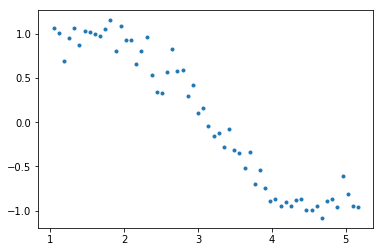

In [58]:
#Demo Model Complexity Increased with N-number of features
# https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
plt.plot(data['x'],data['y'],'.')
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i


In [59]:

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}


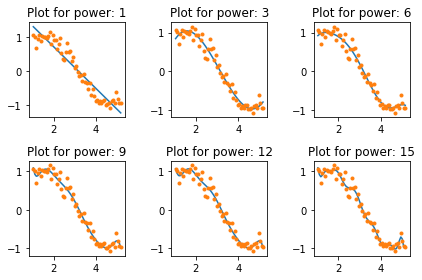

In [60]:

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [61]:
# Exponential Growth inside of model complexity; 
# Constrain your coefficient magnitudes
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


If a features becomes too much of the models core emphasis in predictions, the model focuses on estimating the output according to those relations and overfitting itself to the training data

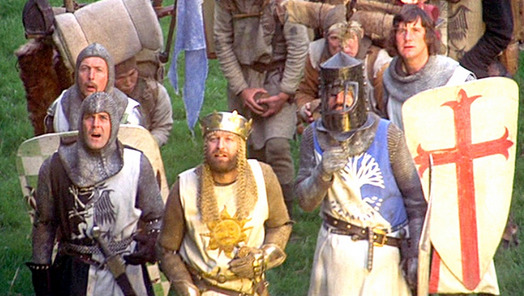

In [62]:
from IPython.display import Image
Image("../src/photos/holy_grail.png")

### Least *Absolute* Shrinkage & *Selection* Operator
----
* Performs an L1 regularization on the model, *sum of absolute values of the magnitude of the coefficients* is added in as a penalty
* Minimizalization objectives: least sqaures objective + $ \alpha $ * ( sum of absolute values of coefficents )

### what is $ \alpha $:
----
a parameter that balances out the amount of emphasis given to minimizing the RSS vs. minimzing the sum of sqaure coeffiencts
###### As $ \alpha $ increases, model complexity decreases



#####  $ \alpha $  = 0 :
----
same as OLS, same coefficients

##### $ \alpha $ equal to $ \infty $ : coefficents = 0

##### As $ \alpha $ is greater than 0 and less than $ \infty $ :Coefficeints will be between 0 and 1
----


In [63]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [64]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}


C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


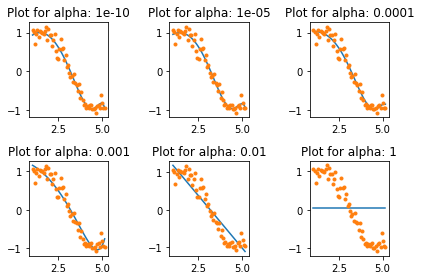

In [65]:

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

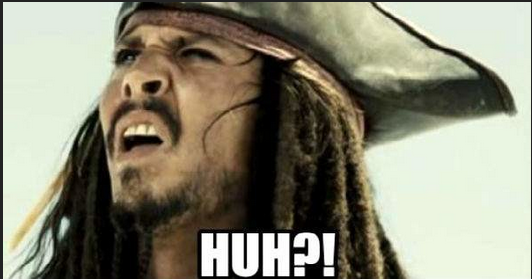

In [66]:
from IPython.display import Image
Image("../src/photos/johnnyD_huh.png")

In [67]:
# many Coefficients are 0, even for very small values of alpha
#      
# coef_matrix_lasso
coef_matrix_lasso.apply(lambda x: sum(x.values==0), axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

##### observe that even for a small value of alpha, a significant number of coefficients are zero.

This also explains the horizontal line fit for alpha=1 in the lasso plots, its just a baseline model!

#### This phenomenon of most of the coefficients being zero is called _‘sparsity‘_.

### Ridge Regression
----
* Performs an L2 regularization on the model, *sum of sqaured values of the magnitude of the coefficients* is added in as a penalty
* Minimizalization objectives: least sqaures objective + $ \alpha $ * ( sum of sqaure values of coefficents )
    * A.K.A: RSS + $ \alpha $ * ( sum of sqaure values of coefficents )

### what is $ \alpha $:
----
a parameter that balances out the amount of emphasis given to minimizing the RSS vs. minimzing the sum of sqaure coeffiencts
* As $ \alpha $ increases, model complexity decreases



#####  $ \alpha $  = 0 :
----
same as OLS, same coefficients

##### $ \alpha $ equal to $ \infty $ : coefficents = 0

##### As $ \alpha $ is greater than 0 and less than $ \infty $ :Coefficeints will be between 0 and 1
----


In [68]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}


C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.468523e-17
  overwrite_a=True).T


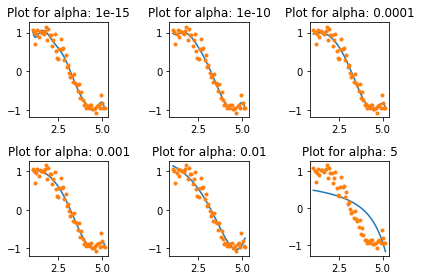

In [69]:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [70]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-3e+02,3.8e+02,-2.3e+02,65,0.54,-4.3,0.39,0.2,-0.028,-0.007,0.0012,0.00019,-5.6e-05,4.1e-06,-7.8e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


#### Though the coeffcients are very small, they aren't zero

#### High alpha can lead to significant underfitting

#### Small Alpha, can perform very well

### What about Elastic Net
----
Elastic Nets combine L1 and L2 transformations

1. Key Difference

    Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.
    Lasso: Along with shrinking coefficients, lasso performs feature selection as well. (Remember the ‘selection‘ in the lasso full-form?) As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

Traditionally, techniques like stepwise regression were used to perform feature selection and make parsimonious models. But with advancements in Machine Learning, ridge and lasso regression provide very good alternatives as they give much better output, require fewer tuning parameters and can be automated to a large extend.

 
2. Typical Use Cases

    Ridge: It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
    Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

Its not hard to see why the stepwise selection techniques become practically very cumbersome to implement in high dimensionality cases. Thus, lasso provides a significant advantage.

 
3. Presence of Highly Correlated Features

    Ridge: It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.
    Lasso: It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.


#### Summary: Predict the price of a vehicle given other information about it


In [71]:
auto_data = pd.read_csv('../data/imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,89,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,89,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,1e+02,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


### 20+ Features for each car
* Missing values represented with `?`

#### Fill missing values with NaN

In [72]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,89,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,89,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500


### Using `Describe()` to generate information about the data
#### Information about numeric fields in our dataframe
Note that the automobile price is not present

In [73]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,2.0e+02,2.0e+02,2.0e+02,2.0e+02,2.0e+02,2.0e+02,2.0e+02,2.0e+02,2.0e+02,2.0e+02
mean,0.83,99,1.7e+02,66,54,2.6e+03,1.3e+02,10,25,31
std,1.2,6,12,2.1,2.4,5.2e+02,42,4,6.5,6.9
min,-2,87,1.4e+02,60,48,1.5e+03,61,7,13,16
25%,0,94,1.7e+02,64,52,2.1e+03,97,8.6,19,25
50%,1,97,1.7e+02,66,54,2.4e+03,1.2e+02,9,24,30
75%,2,1e+02,1.8e+02,67,56,2.9e+03,1.4e+02,9.4,30,34
max,3,1.2e+02,2.1e+02,72,60,4.1e+03,3.3e+02,23,49,54


#### Information about all fields in our dataframe
----
You can see more data fields not included by passing in the kwag `all`

In [74]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,2.0e+02,164,205,205,205,203,205,205,205,2.0e+02,...,2.0e+02,205,201,201,2.0e+02,203,203,2.0e+02,2.0e+02,201
unique,nan,51,22,2,2,2,5,3,2,nan,...,nan,8,38,36,nan,59,23,nan,nan,186
top,nan,161,toyota,gas,std,four,sedan,fwd,front,nan,...,nan,mpfi,3.62,3.4,nan,68,5500,nan,nan,9279
freq,nan,11,32,185,168,114,96,120,202,nan,...,nan,94,23,20,nan,19,37,nan,nan,2
mean,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,...,1.3e+02,NaN,NaN,NaN,10,NaN,NaN,25,31,NaN
std,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,...,42,NaN,NaN,NaN,4,NaN,NaN,6.5,6.9,NaN
min,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,...,61,NaN,NaN,NaN,7,NaN,NaN,13,16,NaN
25%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,...,97,NaN,NaN,NaN,8.6,NaN,NaN,19,25,NaN
50%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,...,1.2e+02,NaN,NaN,NaN,9,NaN,NaN,24,30,NaN
75%,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1e+02,...,1.4e+02,NaN,NaN,NaN,9.4,NaN,NaN,30,34,NaN


### Data Cleaning
Also called data cleansing. Involves identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

#### What data type is price?

In [75]:
auto_data['price'].describe()

count      201
unique     186
top       9279
freq         2
Name: price, dtype: object

#### Convert the values in the price column to numeric values
If conversion throws an error set to NaN (by setting errors='coerce')

In [76]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') 

In [77]:
auto_data['price'].describe()

count     2e+02
mean    1.3e+04
std     7.9e+03
min     5.1e+03
25%     7.8e+03
50%       1e+04
75%     1.6e+04
max     4.5e+04
Name: price, dtype: float64

#### Dropping a column which we deem unnecessary
----
Dropping an insurance-related measure

In [78]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,89,1.7e+02,...,130,mpfi,3.47,2.68,9,111,5000,21,27,1.3e+04
1,3,alfa-romero,gas,std,two,convertible,rwd,front,89,1.7e+02,...,130,mpfi,3.47,2.68,9,111,5000,21,27,1.6e+04
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94,1.7e+02,...,152,mpfi,2.68,3.47,9,154,5000,19,26,1.6e+04
3,2,audi,gas,std,four,sedan,fwd,front,1e+02,1.8e+02,...,109,mpfi,3.19,3.4,10,102,5500,24,30,1.4e+04
4,2,audi,gas,std,four,sedan,4wd,front,99,1.8e+02,...,136,mpfi,3.19,3.4,8,115,5500,18,22,1.7e+04


#### Checking for other processesing

In [79]:
auto_data.describe(include="all")

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,2.0e+02,205,205,205,203,205,205,205,2.0e+02,2.0e+02,...,2.0e+02,205,201,201,2.0e+02,203,203,2.0e+02,2.0e+02,2e+02
unique,nan,22,2,2,2,5,3,2,nan,nan,...,nan,8,38,36,nan,59,23,nan,nan,nan
top,nan,toyota,gas,std,four,sedan,fwd,front,nan,nan,...,nan,mpfi,3.62,3.4,nan,68,5500,nan,nan,nan
freq,nan,32,185,168,114,96,120,202,nan,nan,...,nan,94,23,20,nan,19,37,nan,nan,nan
mean,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,1.7e+02,...,1.3e+02,NaN,NaN,NaN,10,NaN,NaN,25,31,1.3e+04
std,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,12,...,42,NaN,NaN,NaN,4,NaN,NaN,6.5,6.9,7.9e+03
min,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,1.4e+02,...,61,NaN,NaN,NaN,7,NaN,NaN,13,16,5.1e+03
25%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,1.7e+02,...,97,NaN,NaN,NaN,8.6,NaN,NaN,19,25,7.8e+03
50%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,1.7e+02,...,1.2e+02,NaN,NaN,NaN,9,NaN,NaN,24,30,1e+04
75%,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1e+02,1.8e+02,...,1.4e+02,NaN,NaN,NaN,9.4,NaN,NaN,30,34,1.6e+04


In [80]:
auto_data.horsepower.describe()

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

#### Horsepower is also non-numeric...

In [81]:
auto_data['horsepower'].describe()

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

#### ...so this is also converted to a numeric value

In [82]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce') 

In [83]:
auto_data['horsepower'].describe()

count     2e+02
mean      1e+02
std          40
min          48
25%          70
50%          95
75%     1.2e+02
max     2.9e+02
Name: horsepower, dtype: float64

### Dealing with Categorical Values 
----
Mapping categorical to numeric values to make sense
we aren't encoding
we are _just_ assigning the numbers that will allow calculation

In [84]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

#### Since there are only 7 unique values, we can explicitly set the corresponding numeric values

In [85]:
auto_data['num-of-cylinders']

0       four
1       four
2        six
3       four
4       five
5       five
6       five
7       five
8       five
9       five
10      four
11      four
12       six
13       six
14       six
15       six
16       six
17       six
18     three
19      four
20      four
21      four
22      four
23      four
24      four
25      four
26      four
27      four
28      four
29      four
       ...  
175     four
176     four
177     four
178      six
179      six
180      six
181      six
182     four
183     four
184     four
185     four
186     four
187     four
188     four
189     four
190     four
191     five
192     four
193     four
194     four
195     four
196     four
197     four
198     four
199     four
200     four
201     four
202      six
203      six
204     four
Name: num-of-cylinders, Length: 205, dtype: object

In [86]:
cylinders_dict = {'two': 2, 
                  'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)


#### All other non-numeric fields can be made into usable features by applying one-hot-encoding

In [87]:
auto_data = pd.get_dummies(auto_data, 
                           columns=['make', 
                                    'fuel-type', 
                                    'aspiration', 
                                    'num-of-doors', 
                                    'body-style', 
                                    'drive-wheels', 
                                    'engine-location', 
                                    'engine-type', 
                                    'fuel-system'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,89,1.7e+02,64,49,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,89,1.7e+02,64,49,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94,1.7e+02,66,52,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,1e+02,1.8e+02,66,54,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99,1.8e+02,66,54,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


#### Drop rows containing missing values
----
Save dropping `na` values until nearly the last step

In [88]:
auto_data = auto_data.dropna()
auto_data.tail(3)

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
202,-1,1.1e+02,1.9e+02,69,56,3012,6,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,-1,1.1e+02,1.9e+02,69,56,3217,6,145,3.01,3.4,...,0,0,0,0,0,1,0,0,0,0
204,-1,1.1e+02,1.9e+02,69,56,3062,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0


#### Verify that there are no null values in the data set

In [89]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


### Data Cleaning is now complete
We can now use our data to build our models

#### Create training and test data using train_test_split`

In [90]:
# Function to train and test the data into instances for us
# Splitting the data will allow us to tune the model and help it perform
# against unseen data
from sklearn.model_selection import train_test_split

# not part of the X variables; 
X = auto_data.drop('price', axis=1)

# Taking the labels (price)
Y = auto_data['price']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Create a LinearRegression model with our training data
----
Instantiate an instance of the `sklearn.LinearRegression()` and then `fit()` you model with your data.
* Estimators are high-level objects in sklearn that offer `fit()`

In [91]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### X values will not be overwritten

#### _fit intercept_ will fit the line because the data is not centered around 0

#### normalized is false, we do not need to normalize this data set. 

#### Check R-square on training data
----
calling the `score()` on the linear model

In [92]:
linear_model.score(X_train, Y_train)

0.967922737092433

`96%` of the data is captured by the line

#### View coefficients for each feature
----
weights for each feature in the data set

In [93]:
linear_model.coef_

array([-5.80061464e+02,  3.06874682e+02, -1.06499194e+02,  1.52236727e+02,
       -5.05771408e+02,  5.30902624e+00, -4.15988710e+03,  2.82885047e+02,
       -1.75044342e+04, -4.49860407e+03, -1.59555122e+03, -4.82296063e+01,
        2.15673623e+00, -6.79852969e+01,  1.73362582e+02, -3.74284422e+03,
        3.71721668e+03,  6.86565908e+03, -4.12474818e+03, -4.48093478e+03,
       -2.94555422e+02, -4.74283895e+03,  3.47319261e+03, -4.08732786e+02,
        3.02841192e+03,  2.30284405e+03, -4.71448781e+03, -6.67651176e+02,
       -8.40276958e+03, -5.25933085e+03,  1.04713265e+04,  9.09494702e-12,
        8.36042927e+03, -4.81543507e+02, -2.06062392e+03,  6.21153583e+01,
        1.09986569e+03,  6.06615966e+03, -6.06615966e+03, -1.38232301e+03,
        1.38232301e+03,  3.37569880e+03,  3.28229109e+03,  2.99875643e+03,
       -1.00643481e+03, -1.20820627e+03, -3.92414032e+02, -3.91701310e+02,
       -4.99487338e+02, -6.59140532e+02,  1.15862787e+03, -2.46748485e+03,
        2.46748485e+03, -

#### A better view of the coefficients
List of features and their coefficients, ordered by coefficient value

coefficents with small of negative numbers will have little or negative effects on the price, while other features will have large effects on the price of the car as we predict it

In [94]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

bore                     -1.8e+04
make_peugot              -8.4e+03
fuel-type_gas            -6.1e+03
make_plymouth            -5.3e+03
make_isuzu               -4.7e+03
make_mitsubishi          -4.7e+03
stroke                   -4.5e+03
make_dodge               -4.5e+03
num-of-cylinders         -4.2e+03
make_chevrolet           -4.1e+03
fuel-system_1bbl         -3.9e+03
make_alfa-romero         -3.7e+03
engine-type_ohcv         -3.7e+03
engine-location_front    -2.5e+03
fuel-system_spdi         -2.1e+03
make_toyota              -2.1e+03
fuel-system_mfi          -1.7e+03
compression-ratio        -1.6e+03
aspiration_std           -1.4e+03
body-style_hatchback     -1.2e+03
body-style_hardtop         -1e+03
engine-type_ohc          -9.8e+02
fuel-system_mpfi         -7.4e+02
make_nissan              -6.7e+02
drive-wheels_fwd         -6.6e+02
symboling                -5.8e+02
fuel-system_2bbl         -5.5e+02
height                   -5.1e+02
drive-wheels_4wd           -5e+02
make_subaru   

#### Make predictions on test data
----
All estimators have a `predict()` attached to them that allows you to predict values using the trained model

In [95]:
y_predict = linear_model.predict(x_test)

#### Compare predicted and actual values of Price

Populating the interactive namespace from numpy and matplotlib


C:\Users\Tommy\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


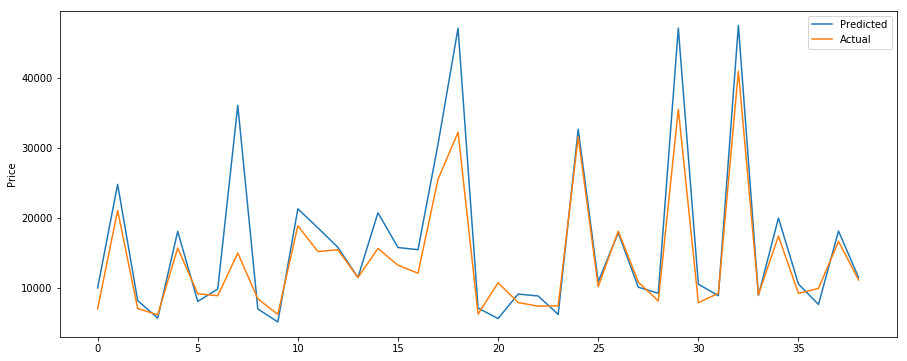

In [96]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### R-square score
For our model, how well do the features describe the price?

In [97]:
linear_r_square = linear_model.score(x_test, y_test)
lasso_r_sqaure = lasso_model.score(x_test, y_test)

print('linear model r sqaure is: ',linear_r_square, 'Versus \n lasso model r sqaure', lasso_r_sqaure)


NameError: name 'lasso_model' is not defined

#### Testing the Model itself using MSE and RootMSE

#### Calculate Mean Square Error

In [ ]:
from sklearn.metrics import mean_squared_error

lasso_model_mse = mean_squared_error(y_predict, y_test)
lasso_model_mse

#### Root of Mean Square Error

In [ ]:
import math

math.sqrt(linear_model_mse)

`linear_model_mse` can be in the positive or negative direction

### Lasso Regression
Cost Function: RSS + <b>&alpha;</b>*(sum of absolute values of coefficients)

RSS = Residual Sum of Squares

Larger values of <b>&alpha;</b> should result in smaller coefficients as the cost function needs to be minimized

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5, normalize=True)
lasso_model.fit(X_train, Y_train)

#### Check R-square on training data

In [ ]:
lasso_model.score(X_train, Y_train)

#### Coefficients when using Lasso

In [ ]:
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

#### Make predictions on test data

In [ ]:
y_predict = lasso_model.predict(x_test)

#### Compare predicted and actual values of Price

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Check R-square value on test data

In [ ]:
r_square = lasso_model.score(x_test, y_test)
r_square

#### Is the root mean square error any better?

In [ ]:
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

### Ridge Regression
Cost Function: RSS + <b>&alpha;</b>*(sum of squares of coefficients)

RSS = Residual Sum of Squares

Larger values of α should result in smaller coefficients as the cost function needs to be minimized

Ridge Regression penalizes large coefficients even more than Lasso as coefficients are squared in cost function

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.05, normalize=True)
ridge_model.fit(X_train, Y_train)

#### Check R-square on training  data

In [ ]:
ridge_model.score(X_train, Y_train)

#### Coefficients when using Ridge

In [ ]:
coef = pd.Series(ridge_model.coef_,predictors).sort_values()
print(coef)

#### Make predictions on test data

In [ ]:
y_predict = ridge_model.predict(x_test)

#### Compare predicted and actual values of Price

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Get R-square value for test data

In [ ]:
r_square = ridge_model.score(x_test, y_test)
r_square

In [ ]:
ridge_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(ridge_model_mse)